**特征工程就是从原始数据中找到最有价值的信息，并转换成计算机所能读懂的形式**

### 字符串编码 

In [1]:
import pandas as pd
import numpy as np

In [5]:
vg_df=pd.read_csv('E:/jupyter/vgsales.csv',encoding='ISO-8859-1')
vg_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


**Genre是数据的字符标签**

In [6]:
##找到其中所有唯一的的属性值
genres=np.unique(vg_df['Genre'])
genres

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

**有12个不同的属性值**

### 1 采用映射 

**利用sklearn中的包**

In [8]:
from sklearn.preprocessing import LabelEncoder
gle=LabelEncoder()
genre_lables=gle.fit_transform(vg_df['Genre'])##关键一步
genre_mappings={index: label for index ,label in enumerate(gle.classes_)}
genre_lables

array([10,  4,  6, ...,  6,  5,  4])

In [9]:
vg_df['GenreLabel']=genre_lables
vg_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,GenreLabel
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,10
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,6
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,10
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,7


**自定义映射**

In [10]:
poke_df=pd.read_csv('E:/jupyter/Pokemon.csv',encoding='utf-8')
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


In [11]:
np.unique(poke_df['Generation'])

array(['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6'], dtype=object)

In [13]:
##定义映射字典
gen_ord_map={'Gen 1':1,'Gen 2':2,'Gen 3':3,'Gen 4':4,'Gen 5':5,'Gen 6':6}
poke_df['GenerationLabel']=poke_df['Generation'].map(gen_ord_map)
poke_df[['Name','Generation','GenerationLabel']].head()

,Name,Generation,GenerationLabel
0,Bulbasaur,Gen 1,1
1,Ivysaur,Gen 1,1
2,Venusaur,Gen 1,1
3,VenusaurMega Venusaur,Gen 1,1
4,Charmander,Gen 1,1


**利用pandas包进行独热编码**

In [16]:
gen_onehot_features=pd.get_dummies(poke_df['Generation'],prefix='one-hot')
pd.concat([poke_df[['Name','Generation']],gen_onehot_features],axis=1).tail()

,Name,Generation,one-hot_Gen 1,one-hot_Gen 2,one-hot_Gen 3,one-hot_Gen 4,one-hot_Gen 5,one-hot_Gen 6
795,Diancie,Gen 6,0,0,0,0,0,1
796,DiancieMega Diancie,Gen 6,0,0,0,0,0,1
797,HoopaHoopa Confined,Gen 6,0,0,0,0,0,1
798,HoopaHoopa Unbound,Gen 6,0,0,0,0,0,1
799,Volcanion,Gen 6,0,0,0,0,0,1


**二值与多项式特征**

In [17]:
##音乐数据集
popsong_df=pd.read_csv('E:/jupyter/song_views.csv',encoding='utf-8')
popsong_df.head(10)


,user_id,song_id,title,listen_count
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0


In [18]:
popsong_df.shape

(365, 4)

**设置二值特征**

In [19]:
##用户是否听歌
watched=np.array(popsong_df['listen_count'])
watched[watched>=1]=1
##返回到dataframe中
popsong_df['watched']=watched
popsong_df.head(10)

,user_id,song_id,title,listen_count,watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0


**同样也可以用sklearn中的包Binarizer来完成**

In [20]:
from sklearn.preprocessing import Binarizer
##制定合适的判断阈值
bn=Binarizer(threshold=0.9)
pd_watched=bn.transform([popsong_df['listen_count']])[0]##原返回值是数组形式，把里面的唯一一个元素去出来
popsong_df['pd_watched']=pd_watched
popsong_df.head()

,user_id,song_id,title,listen_count,watched,pd_watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0,0


array([[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**多项式特征**

In [24]:
poke_df=pd.read_csv('E:/jupyter/Pokemon.csv',encoding='utf-8')
atk_def=poke_df[['Attack','Defense']]
atk_def.head()

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


In [26]:
from sklearn.preprocessing import PolynomialFeatures


In [31]:
pf=PolynomialFeatures(degree=2,interaction_only=False,include_bias=False)
res=pf.fit_transform(atk_def)
res[:5]


array([[   49.,    49.,  2401.,  2401.,  2401.],
       [   62.,    63.,  3844.,  3906.,  3969.],
       [   82.,    83.,  6724.,  6806.,  6889.],
       [  100.,   123., 10000., 12300., 15129.],
       [   52.,    43.,  2704.,  2236.,  1849.]])

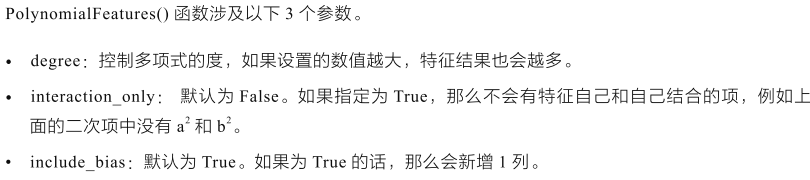

In [29]:
intr_features=pd.DataFrame(res,columns=['Attack','Defense','Attack^2','Attackx Defense','Defense^2'])
intr_features.head()

,Attack,Defense,Attack^2,Attackx Defense,Defense^2
0,49.0,49.0,2401.0,2401.0,2401.0
1,62.0,63.0,3844.0,3906.0,3969.0
2,82.0,83.0,6724.0,6806.0,6889.0
3,100.0,123.0,10000.0,12300.0,15129.0
4,52.0,43.0,2704.0,2236.0,1849.0


### 连续值离散化 

In [32]:
fcc_survey_df=pd.read_csv('E:/jupyter/fcc_2016_coder_survey_subset.csv',encoding='utf-8')
fcc_survey_df[['ID.x','EmploymentField','Age','Income']].head()

,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


**在age一列，查看年龄分布情况**

In [33]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

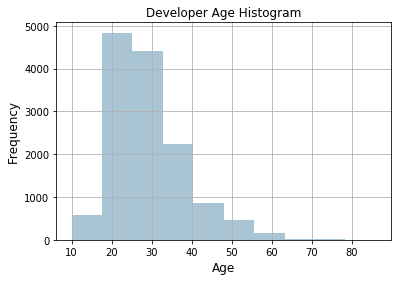

In [34]:
fig,ax=plt.subplots()
fcc_survey_df['Age'].hist(color='#A9C5D3')
ax.set_title('Developer Age Histogram',fontsize=12)
ax.set_xlabel('Age',fontsize=12)
ax.set_ylabel('Frequency',fontsize=12)

In [35]:
fcc_survey_df['Age_bin_round']=np.array(np.floor(np.array(fcc_survey_df['Age'])/10.))
fcc_survey_df[['ID.x','Age','Age_bin_round']].head()

,ID.x,Age,Age_bin_round
0,cef35615d61b202f1dc794ef2746df14,28.0,2.0
1,323e5a113644d18185c743c241407754,22.0,2.0
2,b29a1027e5cd062e654a63764157461d,19.0,1.0
3,04a11e4bcb573a1261eb0d9948d32637,26.0,2.0
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,2.0


**看看收入情况**

Text(0, 0.5, 'Frequency')

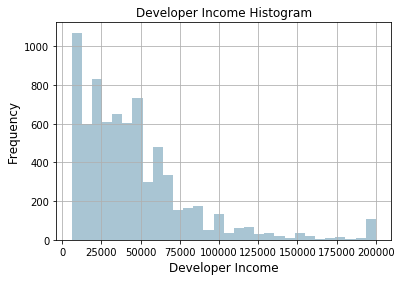

In [37]:
fig,ax=plt.subplots()
fcc_survey_df['Income'].hist(bins=30,color='#A9C5D3')
ax.set_title('Developer Income Histogram',fontsize=12)
ax.set_xlabel('Developer Income',fontsize=12)
ax.set_ylabel('Frequency',fontsize=12)

**利用分位数进行分箱**
按照比例划分

In [40]:
quantile_list=[0,0.25,0.5,0.75,1]
quantiles=fcc_survey_df['Income'].quantile(quantile_list)
quantiles

0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64

**quantile函数按照选择的比例得到对应的切分值，再应用到数据中金子那个离散化**

In [41]:
quantile_labels=['0-25Q','25-50Q','50-75Q','75-100Q']
fcc_survey_df['Income_quantile_range']=pd.qcut(fcc_survey_df['Income'],q=quantile_list)
fcc_survey_df['Income_quantile_label']=pd.qcut(fcc_survey_df['Income'],q=quantile_list,labels=quantile_labels)
fcc_survey_df[['ID.x','Age','Income','Income_quantile_range','Income_quantile_label']].iloc[4:9]

,ID.x,Age,Income,Income_quantile_range,Income_quantile_label
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"(5999.999, 20000.0]",0-25Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,"(37000.0, 60000.0]",50-75Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,"(20000.0, 37000.0]",25-50Q
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,"(37000.0, 60000.0]",50-75Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,"(60000.0, 200000.0]",75-100Q


### 对数与时间变换

Text(11.5, 450, '$\\mu$=10.43')

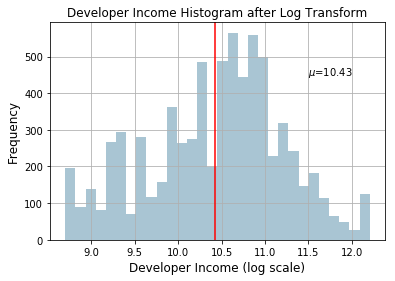

In [42]:
##对数变换
fcc_survey_df['Income_log']=np.log((1+fcc_survey_df['Income']))
income_log_mean=np.round(np.mean(fcc_survey_df['Income_log']),2)
##绘图
fig,ax=plt.subplots()
fcc_survey_df['Income_log'].hist(bins=30,color='#A9C5D3')
plt.axvline(income_log_mean,color='r')
ax.set_title('Developer Income Histogram after Log Transform',fontsize=12)
ax.set_xlabel('Developer Income (log scale)',fontsize=12)
ax.set_ylabel('Frequency',fontsize=12)
ax.text(11.5,450,r'$\mu$='+str(income_log_mean),fontsize=10)

**时间特征**